<a href="https://colab.research.google.com/github/BernasconiLorenzo06/PANDAS_FILE/blob/main/dataframe_colonnine_MatPlotLib_Standard_Complesso_torta_con_aggiunte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

materiale: https://www.kaggle.com/


In [1]:
import matplotlib.pyplot as plt
import pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
colonnine = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/ricarica_colonnine.csv', sep = ';')

In [4]:
colxquart = colonnine.groupby("municipio")[["numero_col"]].sum().reset_index()
colxquart

,municipio,numero_col
0,1,63
1,2,28
2,3,23
3,4,22
4,5,17
5,6,29
6,7,18
7,8,35
8,9,32


In [5]:
colonnineNoDuplicati = colonnine.drop_duplicates(subset = ['municipio', 'titolare'], keep = 'last')

In [6]:
fornMunicpio = colonnineNoDuplicati.groupby('municipio')[['titolare']].count().reset_index()
fornMunicpio

,municipio,titolare
0,1,7
1,2,4
2,3,4
3,4,5
4,5,4
5,6,5
6,7,4
7,8,7
8,9,7


In [7]:
unito = colxquart.merge(fornMunicpio, on = 'municipio')
unito

,municipio,numero_col,titolare
0,1,63,7
1,2,28,4
2,3,23,4
3,4,22,5
4,5,17,4
5,6,29,5
6,7,18,4
7,8,35,7
8,9,32,7


In [8]:
import numpy as np

**barre verticali**

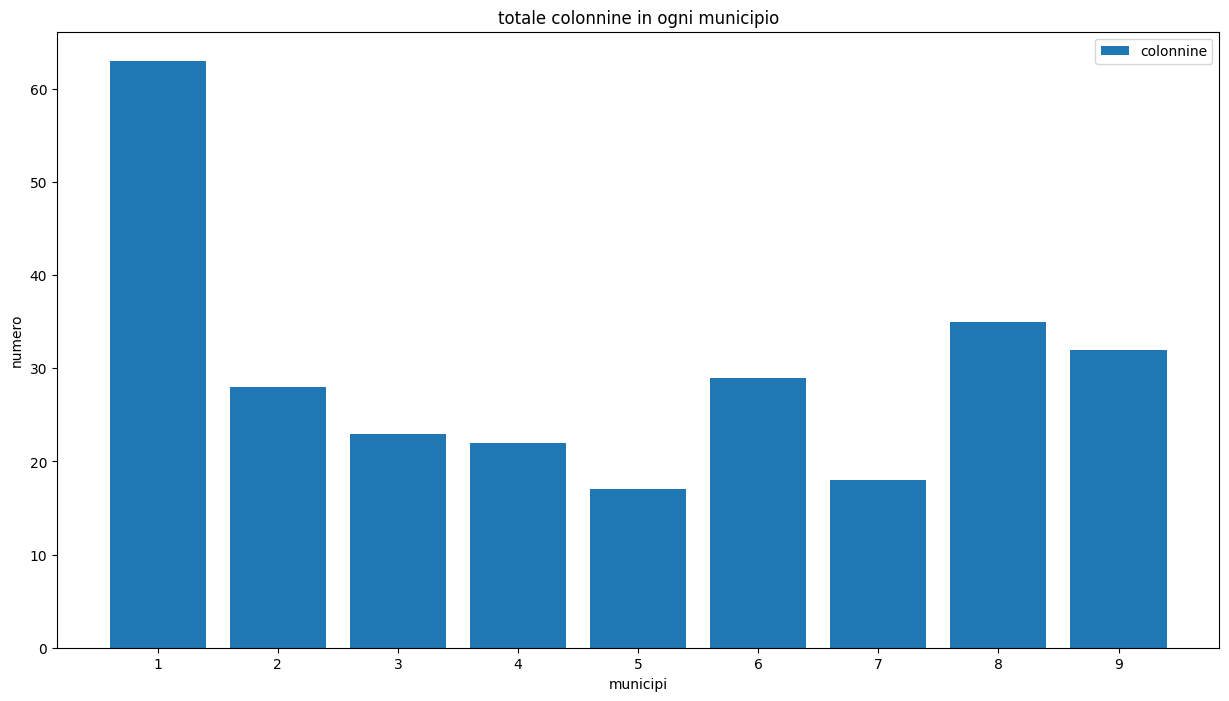

In [9]:
ascisse = colxquart['municipio'].map(str)
ordinate = colxquart['numero_col']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ascisse, ordinate, label='colonnine')

ax.set_ylabel('numero')
ax.set_xlabel('municipi')
ax.set_title('totale colonnine in ogni municipio')
ax.legend()

**barre verticali colorato**

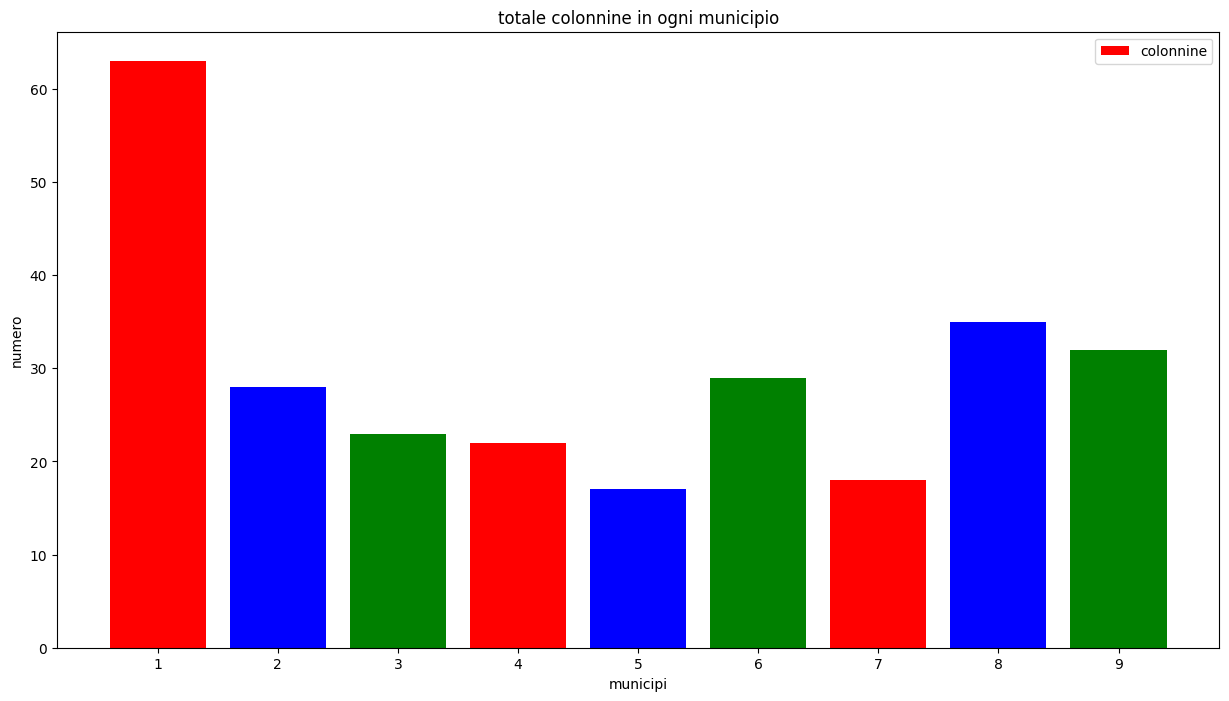

In [10]:
ascisse = colxquart['municipio'].map(str)
ordinate = colxquart['numero_col']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ascisse, ordinate, label='colonnine', color = ['red', 'blue', 'green'])

ax.set_ylabel('numero')
ax.set_xlabel('municipi')
ax.set_title('totale colonnine in ogni municipio')
ax.legend()

**barre orizzontali**

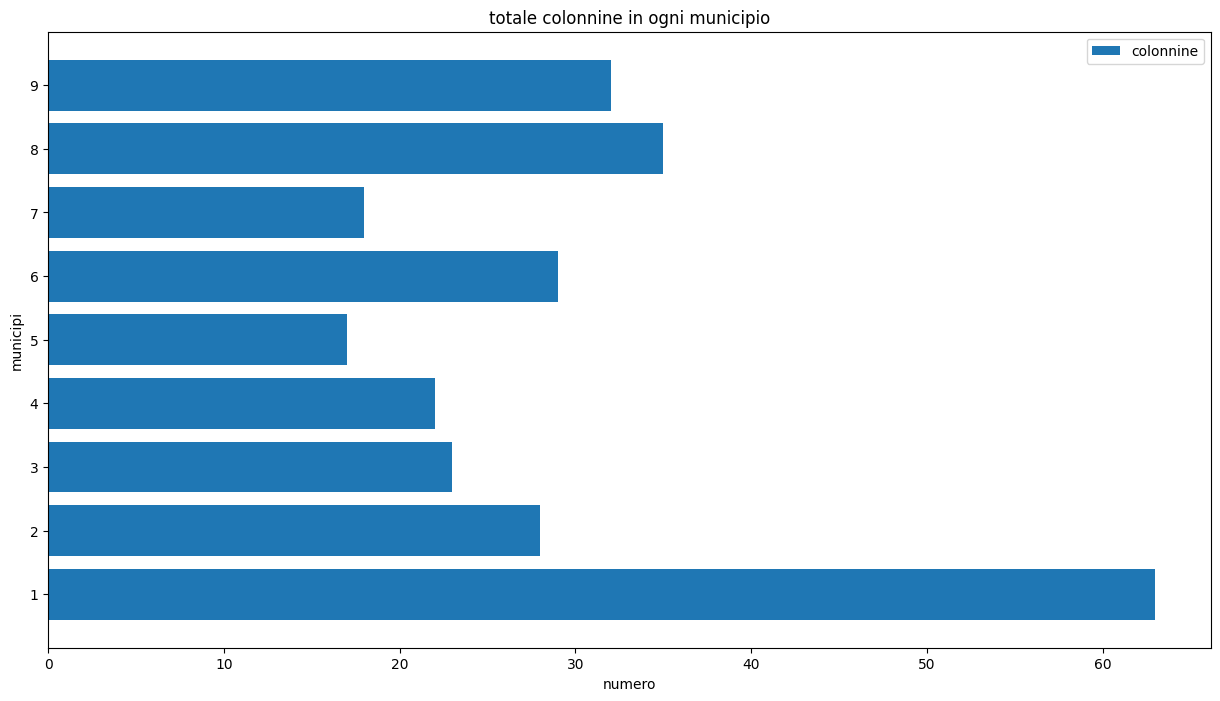

In [11]:
ascisse = colxquart['municipio'].map(str)
ordinate = colxquart['numero_col']

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(ascisse, ordinate, label='colonnine')

ax.set_ylabel('municipi')
ax.set_xlabel('numero')
ax.set_title('totale colonnine in ogni municipio')
ax.legend()

**treemap**

In [12]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import squarify

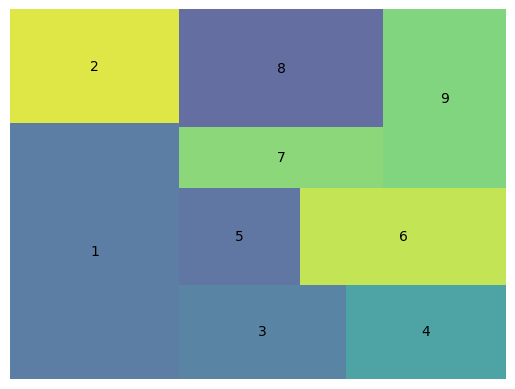

In [14]:
nomi = colxquart['municipio']
dati = colxquart['numero_col']

squarify.plot(sizes=dati, label=nomi, alpha=.8)
plt.axis('off')
plt.show()

**grafico a torta**
1. evidenziare un settore
2. separarazione settori
3. sostituzione percentuale con valore assoluto
4. ruotare la torta in modo da avere un determinato valore all'inizio

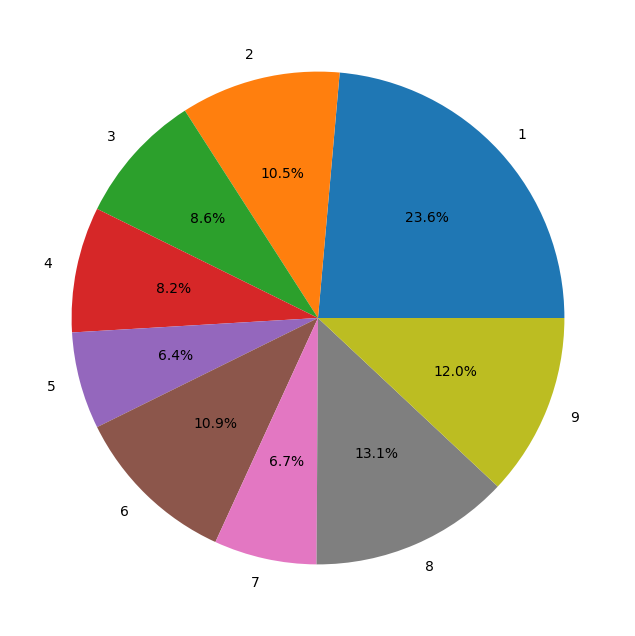

In [15]:
ascisse = colxquart['municipio']
ordinate = colxquart['numero_col']

plt.figure(figsize=(16, 8))
plt.pie(ordinate, labels=ascisse, autopct='%1.1f%%')
plt.show()

sito: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

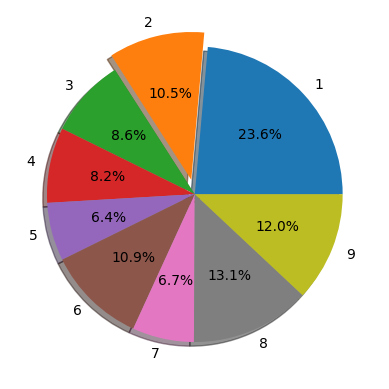

In [16]:
#evidenziare un settore
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs'). La lunghezza della tupla deve essere uguale al numero di spicchi presenti 

fig, ax = plt.subplots()
ax.pie(ordinate, explode=explode, labels=ascisse, autopct='%1.1f%%', shadow=True)
plt.show()

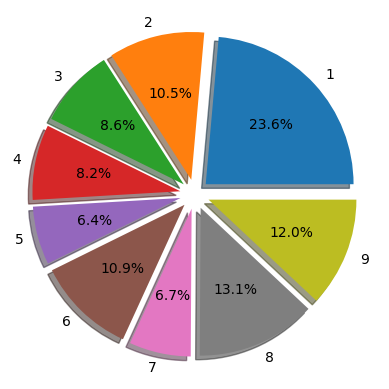

In [17]:
#separazione di settore
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 

fig, ax = plt.subplots()
ax.pie(ordinate, explode=explode, labels=ascisse, autopct='%1.1f%%', shadow=True)
plt.show()

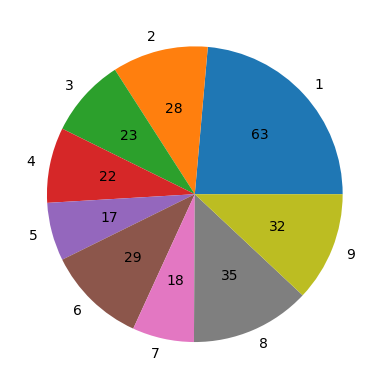

In [18]:
#sostituire percentuale con valore assoluto
fig, ax = plt.subplots()
ax.pie(ordinate, labels=ascisse, autopct= lambda p:  '{:.0f}'.format(p * (ordinate.sum()) / 100))  #ordinate.sum(): somma del numero di colonnine dal dato precedente
plt.show()

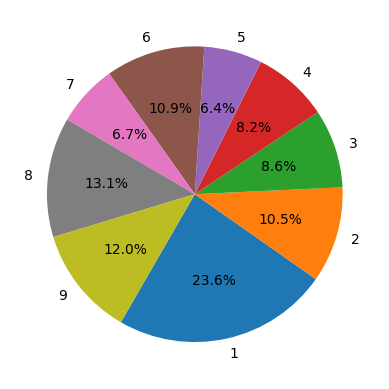

In [19]:
#ruotare la torta in modo da avere un determinato valore all'inizio
fig, ax = plt.subplots()
ax.pie(ordinate, labels=ascisse, autopct='%1.1f%%', startangle=240)   #startangle: ruota il grafico a torta. Va da 0 a 360
plt.show()

**grafico a barre verticali doppio**

In [20]:
unito

,municipio,numero_col,titolare
0,1,63,7
1,2,28,4
2,3,23,4
3,4,22,5
4,5,17,4
5,6,29,5
6,7,18,4
7,8,35,7
8,9,32,7


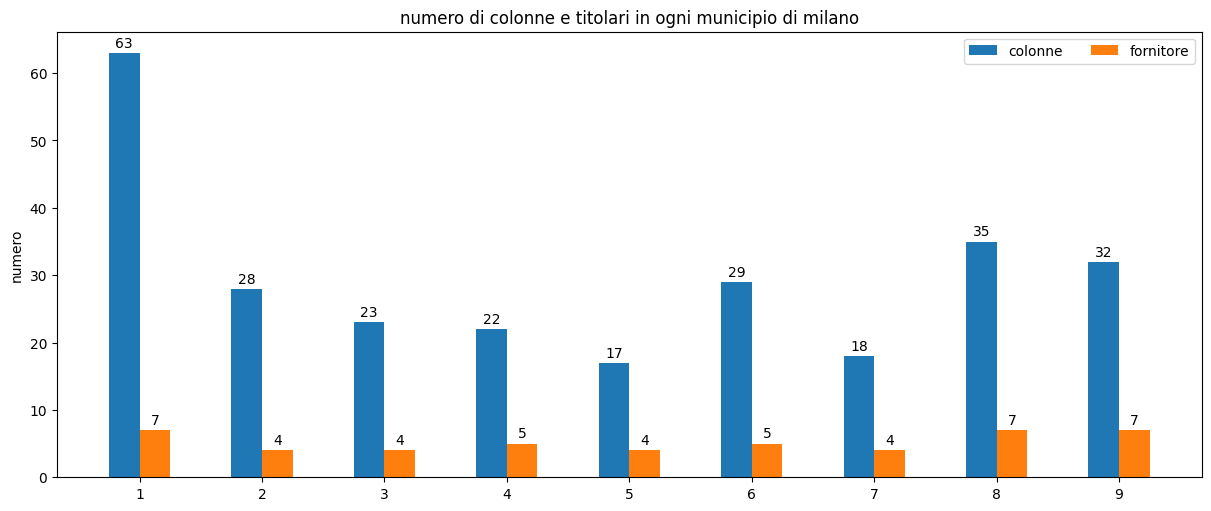

In [21]:
stringhe = unito['municipio']
dati = {
    "colonne": np.array(unito['numero_col']),
    "fornitore": np.array(unito['titolare'])
}

x = np.arange(len(stringhe))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize = (12, 5))

for nome, valore in dati.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valore, width, label=nome)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('numero')
ax.set_title('numero di colonne e titolari in ogni municipio di milano')
ax.set_xticks(x + width, stringhe)
ax.legend(loc='upper right', ncols=2)

plt.show()

**grafico a barre orizzontali doppio**

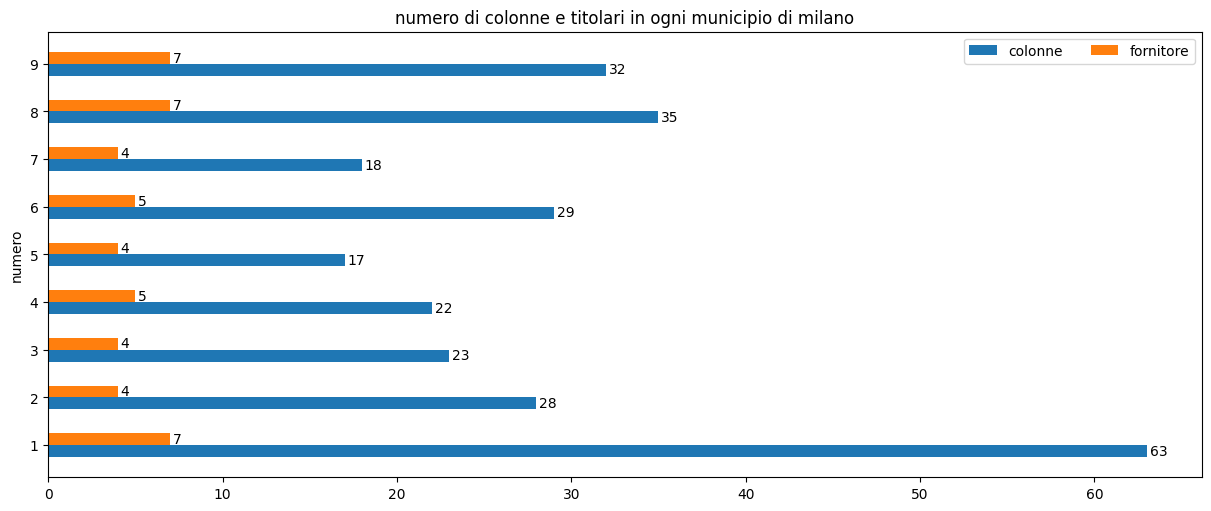

In [22]:
stringhe = unito['municipio']
dati = {
    "colonne": np.array(unito['numero_col']),
    "fornitore": np.array(unito['titolare'])
}

y = np.arange(len(stringhe))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize = (12, 5))

for nome, valore in dati.items():
    offset = width * multiplier
    rects = ax.barh(y + offset, valore, width, label=nome)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('numero')
ax.set_title('numero di colonne e titolari in ogni municipio di milano')
ax.set_yticks(y + width, stringhe)
ax.legend(loc='upper right', ncols=2)

plt.show()

**grafico a blocchi verticale doppio**

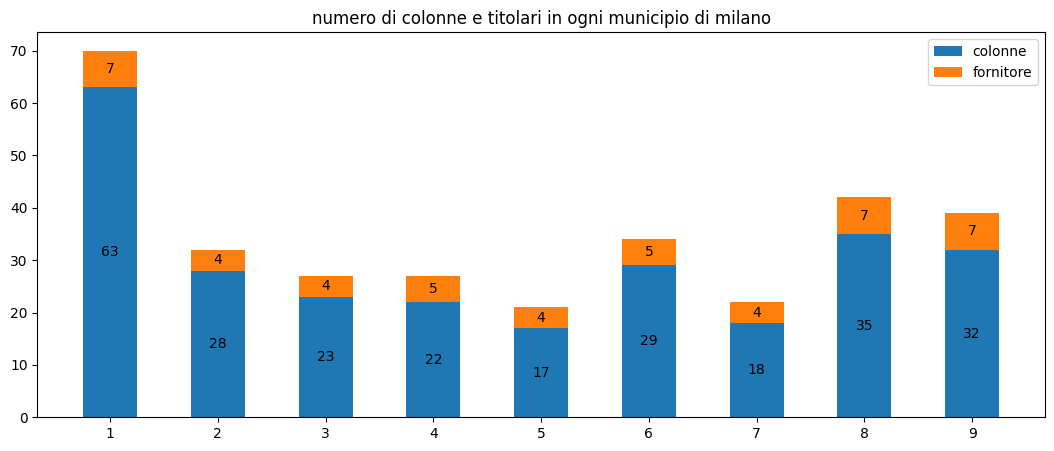

In [23]:
municipi = unito['municipio'].map(str)
tipi = {
    "colonne": np.array(unito['numero_col']),
    "fornitore": np.array(unito['titolare'])
}

width = 0.5

fig, ax = plt.subplots(figsize = (13, 5))
bottom = np.zeros(len(municipi))  #il numero dentro la parentesi deve essere uguale alla lunghezza delle stringhe

for mun, tip in tipi.items():
    p = ax.bar(municipi, tip, width, label=mun, bottom=bottom)
    bottom += tip  #aggiunge alla colonna un altro dato in base al valore (che determina l'altezza della colonna). Parte dal basso
    ax.bar_label(p, label_type='center')  #metto i valori all'interno della colonna

ax.set_title("numero di colonne e titolari in ogni municipio di milano")
ax.legend(loc="upper right")

plt.show()

**grafico a blocchi orizzontale doppio**

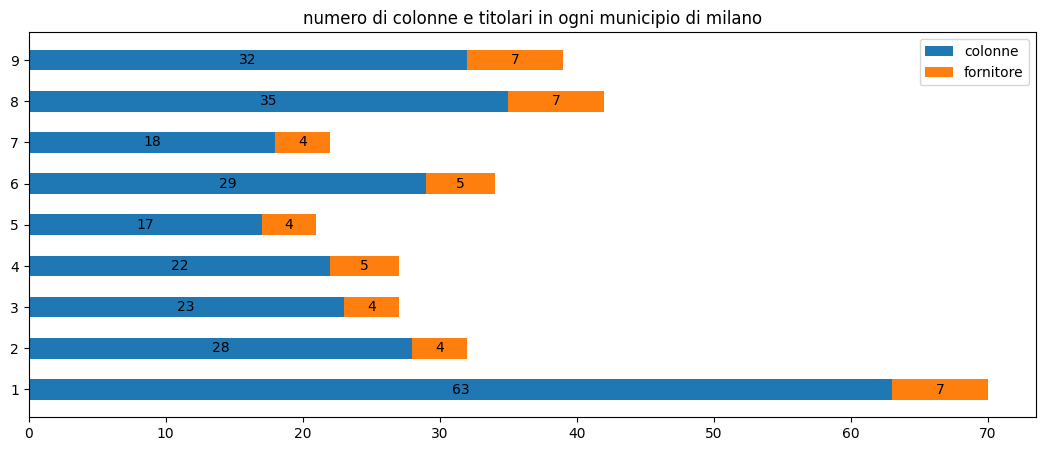

In [24]:
municipi = unito['municipio'].map(str)
tipi = {
    "colonne": np.array(unito['numero_col']),
    "fornitore": np.array(unito['titolare'])
}

width = 0.5

fig, ax = plt.subplots(figsize = (13, 5))
bottom = np.zeros(len(municipi))  #il numero dentro la parentesi deve essere uguale alla lunghezza delle stringhe

for mun, tip in tipi.items():
    p = ax.barh(municipi, tip, width, label=mun, left=bottom)
    bottom += tip  #aggiunge alla colonna un altro dato in base al valore (che determina l'altezza della colonna). Parte dal basso
    ax.bar_label(p, label_type='center')  #metto i valori all'interno della colonna

ax.set_title("numero di colonne e titolari in ogni municipio di milano")
ax.legend(loc="upper right")

plt.show()